In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def label_bar(ax, bars, text_format, is_inside=True, max_stack_bar=False, **kwargs):
    """
    Attach a text label to each bar displaying its y value.
    Example of text_format argument: text_format = "{:6.0f}"
    Modified version done by me
    Original version can be found: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    Example:
    label_bar(ax1, p1+p2+p3, text_format, is_inside=True, max_stack_bar=True, )
    """
    max_y_value_all = max(bar.get_height() + bar.get_y() for bar in bars)
    if is_inside:
        distance = max_y_value_all * 0.05
    else:
        distance = max_y_value_all * 0.01
    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2.
        if is_inside:
            text_y = bar.get_height() + bar.get_y() - distance
            # text_y = bar.get_height()*0.5 + bar.get_y() - distance/2.
        else:
            text_y = bar.get_height() + bar.get_y() + distance
        ax.text(text_x, text_y, text, ha='center', va='bottom', **kwargs, fontsize=16)
    cols_x = list(set([bar.get_x() for bar in bars]))
    num_cols = len(cols_x)
    max_value_per_col=[0]*num_cols
    if max_stack_bar:
        for i in np.arange(num_cols):
            max_value_per_col[i] = max(bar.get_height() + bar.get_y() for bar in bars if(bar.get_x() == cols_x[i]))
            text = text_format.format(max_value_per_col[i])
            width = min(bar.get_width() for bar in bars if(bar.get_x() == cols_x[i]))
            ax.text(cols_x[i] + width/2., max_value_per_col[i], text, ha='center', va='bottom', **kwargs)

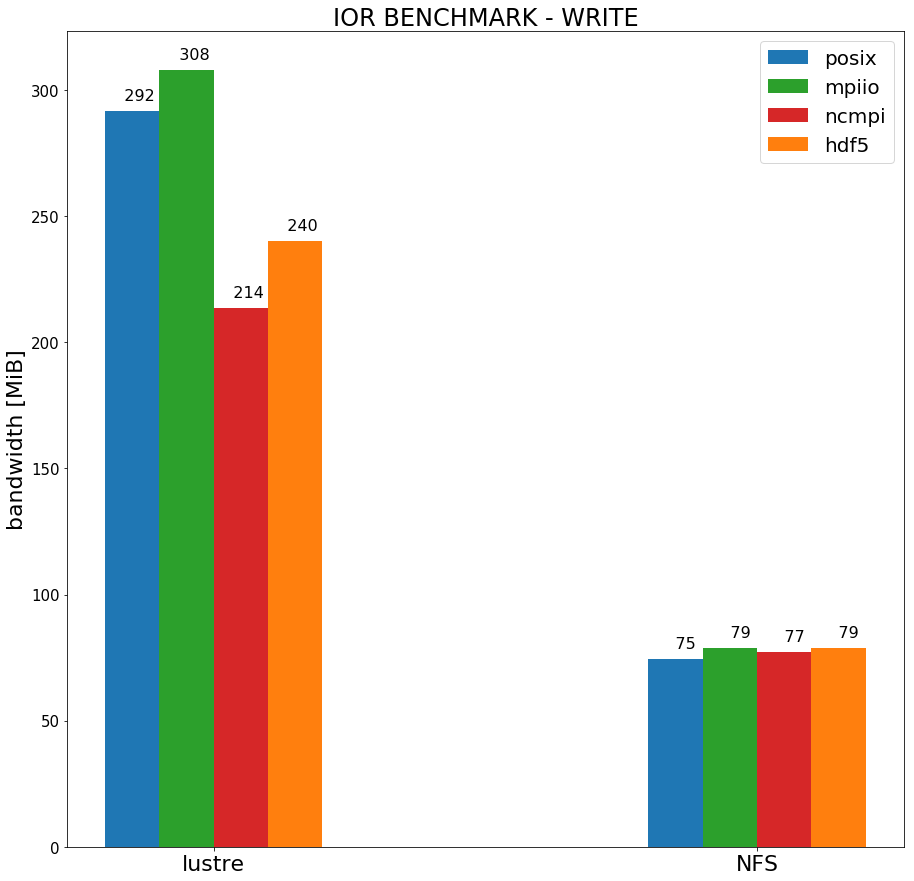

In [10]:
posix, hdf5, mpiio, ncmpi = np.loadtxt('./np48_blocksize3GiB/write_plot.txt', delimiter = ' ', unpack = True, skiprows = 1)

#print(mpiio)
#print(ncmpi)
#print(posix)
#print(hdf5)

index = np.arange(2)
x_axis = ["lustre","NFS"]

width = 0.1

text_format = "{:6.0f}"

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,1,1)

p1 = plt.bar(index - width*3/2, posix, width)
p2 = plt.bar(index + width*3/2, hdf5, width)
p3 = plt.bar(index - width/2, mpiio, width)
p4 = plt.bar(index + width/2, ncmpi, width)

label_bar(ax1, p1+p2+p3+p4, text_format, is_inside=False, max_stack_bar=False, )
plt.title('IOR BENCHMARK - WRITE', fontsize=24)
plt.xticks(index, x_axis, fontsize=22)
plt.yticks(fontsize = 15)
plt.ylabel('bandwidth [MiB]', fontsize=22)
plt.legend((p1[0], p3[0], p4[0], p2[0]), ("posix", "mpiio", "ncmpi", "hdf5"), fontsize=20) #, loc='lower righ'
plt.savefig("./np48_blocksize3GiB/write.png", bbox_inches='tight')

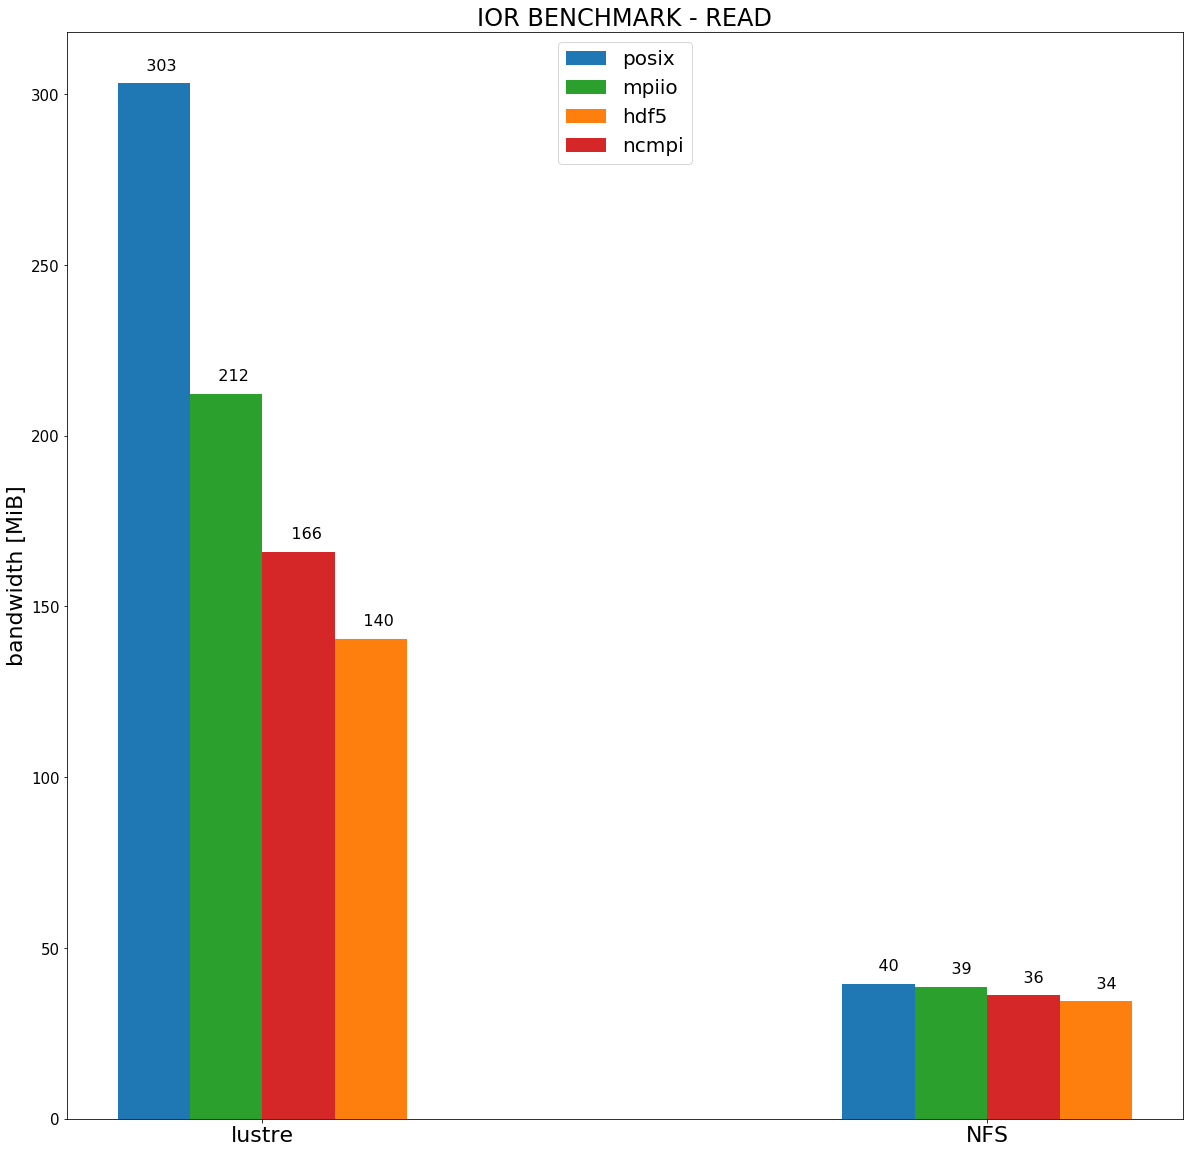

In [19]:
posix, hdf5, mpiio, ncmpi = np.loadtxt('./np48_blocksize3GiB/read_plot.txt', delimiter = ' ', unpack = True, skiprows = 1)

#print(mpiio)
#print(ncmpi)
#print(posix)
#print(hdf5)

index = np.arange(2)
x_axis = ["lustre","NFS"]

width = 0.1

text_format = "{:6.0f}"

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,1,1)

p1 = plt.bar(index - width*3/2, posix, width)
p2 = plt.bar(index + width*3/2, hdf5, width)
p3 = plt.bar(index - width/2, mpiio, width)
p4 = plt.bar(index + width/2, ncmpi, width)

label_bar(ax1, p1+p2+p3+p4, text_format, is_inside=False, max_stack_bar=False, )
plt.title('IOR BENCHMARK - READ', fontsize=24)
plt.xticks(index, x_axis, fontsize=22)
plt.yticks(fontsize = 15)
plt.ylabel('bandwidth [MiB]', fontsize=22)
plt.legend((p1[0], p3[0], p2[0], p4[0]), ("posix", "mpiio","hdf5", "ncmpi"), fontsize=20, loc = 'upper center')
plt.savefig("./np48_blocksize3GiB/read.png", bbox_inches='tight')

In [ ]:
posix, hdf5, mpiio, ncmpi = np.loadtxt('./np48_blocksize3GiB/write_plot.txt', delimiter = ' ', unpack = True, skiprows = 1)

#print(mpiio)
#print(ncmpi)
#print(posix)
#print(hdf5)

index = np.arange(2)
x_axis = ["lustre","NFS"]

width = 0.1

text_format = "{:6.0f}"

fig = plt.figure(figsize=(15,11))
ax1 = fig.add_subplot(1,1,1)

p1 = plt.bar(index - width*3/2, posix, width)
p2 = plt.bar(index + width*3/2, hdf5, width)
p3 = plt.bar(index - width/2, mpiio, width)
p4 = plt.bar(index + width/2, ncmpi, width)

label_bar(ax1, p1+p2+p3+p4, text_format, is_inside=False, max_stack_bar=False, )
plt.title('IOR BENCHMARK - WRITE', fontsize=24)
plt.xticks(index, x_axis, fontsize=22)
plt.yticks(fontsize = 15)
plt.ylabel('bandwidth [MiB]', fontsize=22)
plt.legend((p1[0], p3[0], p4[0], p2[0]), ("posix", "mpiio", "ncmpi", "hdf5"), fontsize=20) #, loc='lower righ'
plt.savefig("./np48_blocksize3GiB/write.png", bbox_inches='tight')